# INTRODUCTION


This is my first attempt at doing a linear regression analysis on my own. The file comes from the world happiness report, which is a Gallup Poll. The two files used were taken from https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021, but the main analysis was done on the the file 'World Happiness report', while the 2021 file was used to map the Regional Indicator.

The variables in the file are:
    
    1) Country name - Simply, the name of the country
    2) Year - the year the data was gathered
    3) Life Ladder - The scale of happiness in a country
    4) Log GDP per capita - the amount of GDP by every 100k people in the country
    5) Social Support - The average amount of support a people in a country recieve support from friends or family if/when  something goes wrong.
    6) Healhty life expectancy at birth - the average life a person has in good health in a country
    7) Freedom to make life choices - the average ability of a person to choose what they want to do with their life in a   country.
    8) Generosity - How much, on average, a person gives to charity in a country.
    9) Perceptions of corruption - How much the people, on average, believe that either the government, businesses, or both are corrupt in their country.
    10) Positive affect - How much, on average, people in a country have positive daily feelings, or laughter
    11) Negative affect - How much, on average, people in a country have negative daily feelings.
 
 
Here, I am attempting to see which of these variables best predicts an increase (or decrease) in the Life Ladder variable. That is, which of these variables best predicts an increase in the happiness of the people in each country.

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [235]:
happy = pd.read_csv('world-happiness-report.csv')
h2021 = pd.read_csv('world-happiness-report-2021.csv')

In [236]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


## Ladder Score is the happiness score in the end. Before concating dataframes together, some columns of the 2021 dataframe (df2) need to be dropped.

In [237]:
happy.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [238]:
happy.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


## Looking at the descriptive data of the Happy dataframe

In [239]:
happy.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


## Looking for missing values

<AxesSubplot:>

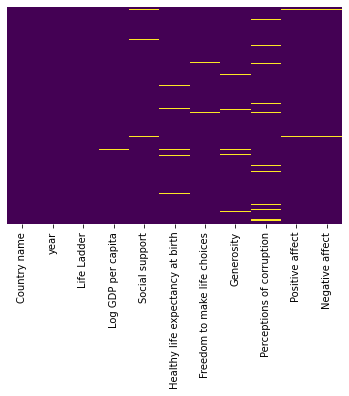

In [240]:
sns.heatmap(happy.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## No clear pattern of missing data. So, let's see how many null values there are and how many are in each column.

In [241]:
happy.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

## Making a dataframe to understand the missing values for Perceptions of corruption, Freedom to make life choices, Generosity, and Soscial Support. I'm doing this to see if there's the best way of filling in missing values.

In [242]:
corrupt = happy[happy['Perceptions of corruption'].isnull()]

In [243]:
corrupt['Country name'].value_counts()

China                   15
Saudi Arabia            12
Jordan                  11
United Arab Emirates    10
Turkmenistan            10
Kuwait                   7
Bahrain                  6
Egypt                    6
Malta                    5
Vietnam                  4
Qatar                    4
Yemen                    3
Uzbekistan               2
Algeria                  2
Libya                    2
Madagascar               1
Oman                     1
Laos                     1
Singapore                1
South Africa             1
Sweden                   1
Ethiopia                 1
Cuba                     1
Congo (Brazzaville)      1
Cambodia                 1
Maldives                 1
Name: Country name, dtype: int64

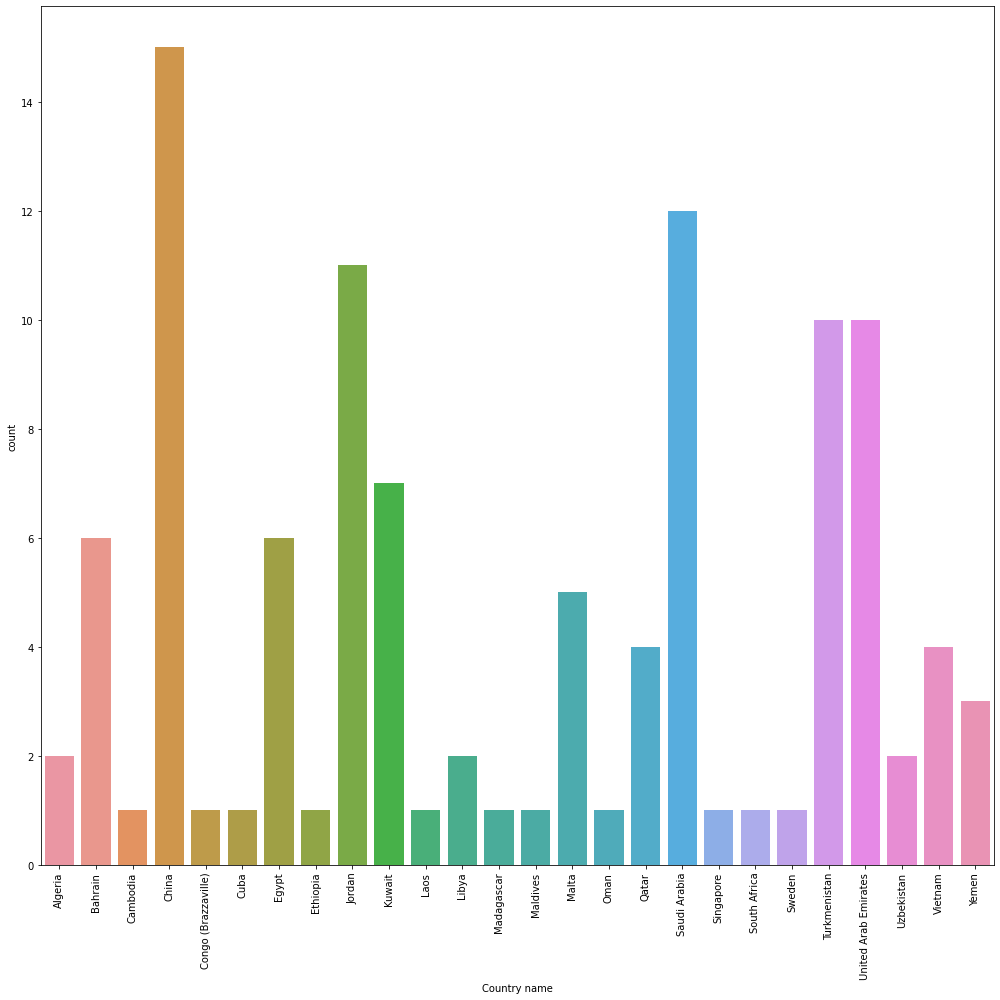

In [244]:
plt.figure(figsize = (14,14))

sns.countplot(x = 'Country name', data = corrupt)
plt.xticks(plt.xticks()[0], rotation=90)
plt.tight_layout()

## Filling missing values with averages grouped by the countries previous data.

In [245]:
#df['value'] = df['value'].fillna(df.groupby('name')['value'].transform('mean'))
happy['Perceptions of corruption'] = happy['Perceptions of corruption'].fillna(happy.groupby('Country name')['Perceptions of corruption'].transform('mean'))

In [246]:
happy.isnull().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  36
Social support                      13
Healthy life expectancy at birth    55
Freedom to make life choices        32
Generosity                          89
Perceptions of corruption           28
Positive affect                     22
Negative affect                     16
dtype: int64

In [247]:
happy['Generosity'] = happy['Generosity'].fillna(happy.groupby('Country name')['Generosity'].transform('mean'))

In [248]:
happy.isnull().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  36
Social support                      13
Healthy life expectancy at birth    55
Freedom to make life choices        32
Generosity                          19
Perceptions of corruption           28
Positive affect                     22
Negative affect                     16
dtype: int64

In [249]:
happy['Freedom to make life choices'] = happy['Freedom to make life choices'].fillna(happy.groupby('Country name')['Freedom to make life choices'].transform('mean'))

In [250]:
happy.isnull().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  36
Social support                      13
Healthy life expectancy at birth    55
Freedom to make life choices         0
Generosity                          19
Perceptions of corruption           28
Positive affect                     22
Negative affect                     16
dtype: int64

In [251]:
happy['Social support'] = happy['Social support'].fillna(happy.groupby('Country name')['Social support'].transform('mean'))

In [252]:
happy.isnull().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  36
Social support                       1
Healthy life expectancy at birth    55
Freedom to make life choices         0
Generosity                          19
Perceptions of corruption           28
Positive affect                     22
Negative affect                     16
dtype: int64

In [253]:
happy['Healthy life expectancy at birth'] = happy['Healthy life expectancy at birth'].fillna(happy.groupby('Country name')['Healthy life expectancy at birth'].transform('mean'))

In [254]:
happy.isnull().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  36
Social support                       1
Healthy life expectancy at birth    36
Freedom to make life choices         0
Generosity                          19
Perceptions of corruption           28
Positive affect                     22
Negative affect                     16
dtype: int64

In [255]:
happy['Log GDP per capita'] = happy['Log GDP per capita'].fillna(happy.groupby('Country name')['Log GDP per capita'].transform('mean'))

In [256]:
happy.isnull().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  19
Social support                       1
Healthy life expectancy at birth    36
Freedom to make life choices         0
Generosity                          19
Perceptions of corruption           28
Positive affect                     22
Negative affect                     16
dtype: int64

In [257]:
happy['Positive affect'] = happy['Positive affect'].fillna(happy.groupby('Country name')['Positive affect'].transform('mean'))

In [258]:
happy.isnull().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  19
Social support                       1
Healthy life expectancy at birth    36
Freedom to make life choices         0
Generosity                          19
Perceptions of corruption           28
Positive affect                      2
Negative affect                     16
dtype: int64

In [259]:
happy['Negative affect'] = happy['Negative affect'].fillna(happy.groupby('Country name')['Negative affect'].transform('mean'))

In [260]:
happy.isnull().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  19
Social support                       1
Healthy life expectancy at birth    36
Freedom to make life choices         0
Generosity                          19
Perceptions of corruption           28
Positive affect                      2
Negative affect                      1
dtype: int64

## Attempting to map a Region column onto the dataframe in order to fill in the rest of the null values.

In [261]:
h2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [262]:
h2021['Regional indicator'].value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

In [263]:
regions = pd.DataFrame(h2021[['Country name','Regional indicator']])

In [264]:
happy['Regional indicator'] = happy['Country name'].map(regions.set_index('Country name')['Regional indicator'])

In [265]:
happy.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


In [266]:
happy['Regional indicator'].value_counts()

Sub-Saharan Africa                    390
Latin America and Caribbean           279
Western Europe                        271
Central and Eastern Europe            225
Middle East and North Africa          211
Commonwealth of Independent States    170
Southeast Asia                        116
South Asia                             84
East Asia                              82
North America and ANZ                  58
Name: Regional indicator, dtype: int64

## What countries are in each region?

This will help fill null values in the Regional indicator column

Commonwealth of Independent States

In [267]:
happy[happy['Regional indicator'] == 'Commonwealth of Independent States']['Country name'].value_counts()

Georgia         15
Kazakhstan      15
Kyrgyzstan      15
Moldova         15
Russia          15
Tajikistan      15
Ukraine         15
Armenia         14
Azerbaijan      14
Belarus         14
Uzbekistan      13
Turkmenistan    10
Name: Country name, dtype: int64

Sub-Saharan Africa

In [268]:
happy[happy['Regional indicator'] == 'Sub-Saharan Africa']['Country name'].value_counts()

Zimbabwe               15
Cameroon               15
Uganda                 15
Tanzania               15
South Africa           15
Ghana                  15
Kenya                  15
Zambia                 14
Chad                   14
Niger                  14
Senegal                14
Nigeria                13
Mauritania             13
Mali                   13
Burkina Faso           13
Rwanda                 12
Botswana               12
Sierra Leone           12
Benin                  12
Malawi                 12
Madagascar             11
Congo (Brazzaville)    10
Ivory Coast             9
Guinea                  9
Liberia                 9
Gabon                   9
Ethiopia                9
Togo                    9
Mozambique              8
Mauritius               7
Namibia                 6
Comoros                 6
Burundi                 5
Lesotho                 4
Swaziland               3
Gambia                  3
Name: Country name, dtype: int64

Latin America and Caribbean

In [269]:
happy[happy['Regional indicator'] == 'Latin America and Caribbean']['Country name'].value_counts()

Argentina             15
Ecuador               15
Uruguay               15
Mexico                15
Bolivia               15
El Salvador           15
Venezuela             15
Dominican Republic    15
Colombia              15
Chile                 15
Brazil                15
Costa Rica            14
Guatemala             14
Honduras              14
Nicaragua             14
Panama                14
Peru                  14
Paraguay              13
Haiti                 11
Jamaica                6
Name: Country name, dtype: int64

Western Europe

In [270]:
happy[happy['Regional indicator'] == 'Western Europe']['Country name'].value_counts()

Italy             15
France            15
Sweden            15
Spain             15
Germany           15
United Kingdom    15
Denmark           15
Greece            14
Ireland           14
Belgium           14
Netherlands       14
Finland           13
Portugal          13
Cyprus            13
Austria           13
Malta             12
Luxembourg        11
Norway            10
Switzerland       10
Iceland            8
North Cyprus       7
Name: Country name, dtype: int64

Central and Eastern Europe

In [271]:
happy[happy['Regional indicator'] == 'Central and Eastern Europe']['Country name'].value_counts()

Lithuania                 15
Latvia                    14
Poland                    14
Estonia                   14
Hungary                   14
Kosovo                    14
Montenegro                13
Serbia                    13
Romania                   13
North Macedonia           13
Albania                   13
Bosnia and Herzegovina    13
Croatia                   13
Slovenia                  13
Czech Republic            12
Bulgaria                  12
Slovakia                  12
Name: Country name, dtype: int64

Middle East and North Africa

In [272]:
happy[happy['Regional indicator'] == 'Middle East and North Africa']['Country name'].value_counts()

Egypt                      15
Israel                     15
Jordan                     15
Turkey                     15
Saudi Arabia               15
Lebanon                    14
Palestinian Territories    14
Iran                       13
United Arab Emirates       13
Tunisia                    12
Yemen                      12
Iraq                       12
Bahrain                    11
Kuwait                     11
Morocco                    10
Algeria                     8
Libya                       6
Name: Country name, dtype: int64

Southeast Asia

In [273]:
happy[happy['Regional indicator'] == 'Southeast Asia']['Country name'].value_counts()

Cambodia       15
Philippines    15
Thailand       15
Indonesia      14
Vietnam        14
Singapore      13
Malaysia       12
Laos            9
Myanmar         9
Name: Country name, dtype: int64

South Asia

In [274]:
happy[happy['Regional indicator'] == 'South Asia']['Country name'].value_counts()

Bangladesh     15
India          15
Nepal          14
Pakistan       14
Sri Lanka      13
Afghanistan    12
Maldives        1
Name: Country name, dtype: int64

East Asia

In [275]:
happy[happy['Regional indicator'] == 'East Asia']['Country name'].value_counts()

China                        15
Japan                        15
South Korea                  15
Mongolia                     13
Taiwan Province of China     13
Hong Kong S.A.R. of China    11
Name: Country name, dtype: int64

North America and ANZ 

In [276]:
happy[happy['Regional indicator'] == 'North America and ANZ']['Country name'].value_counts()

Canada           15
United States    15
Australia        14
New Zealand      14
Name: Country name, dtype: int64

## Which values are missing in the Regional Indicator Column in order to fill them in

In [277]:
happy[happy['Regional indicator'].isnull()]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
33,Angola,2011,5.589,8.946,0.723,52.50,0.584,0.055,0.911,0.659,0.361,NaN
34,Angola,2012,4.360,8.992,0.753,53.20,0.456,-0.136,0.906,0.558,0.305,NaN
35,Angola,2013,3.937,9.005,0.722,53.90,0.410,-0.104,0.816,0.658,0.371,NaN
36,Angola,2014,3.795,9.017,0.755,54.60,0.375,-0.168,0.834,0.579,0.368,NaN
161,Belize,2007,6.451,8.892,0.872,61.60,0.705,0.033,0.769,0.759,0.251,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1736,Trinidad and Tobago,2006,5.832,10.224,0.887,61.76,0.840,0.141,0.917,0.798,0.229,NaN
1737,Trinidad and Tobago,2008,6.696,10.295,0.858,62.08,0.838,0.087,0.959,0.817,0.184,NaN
1738,Trinidad and Tobago,2011,6.519,10.263,0.863,62.54,0.775,0.078,0.900,0.906,0.134,NaN
1739,Trinidad and Tobago,2013,6.168,10.285,0.883,62.82,0.847,0.128,0.948,0.833,0.286,NaN


## Filling the values...per country...

In [278]:
happy.loc[happy['Country name'] == 'Angola', ['Regional indicator']] = 'Sub-Saharan Africa'

In [279]:
happy[happy['Regional indicator'].isnull()]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
161,Belize,2007,6.451,8.892,0.872000,61.60,0.705,0.03300,0.769,0.759000,0.251000,NaN
162,Belize,2014,5.956,8.883,0.757000,62.22,0.874,0.02200,0.782,0.755000,0.282000,NaN
175,Bhutan,2013,5.569,9.123,0.819000,59.60,0.810,0.35300,0.802,0.779000,0.217000,NaN
176,Bhutan,2014,4.939,9.167,0.880000,59.90,0.834,0.26800,0.650,0.859000,0.324000,NaN
177,Bhutan,2015,5.082,9.219,0.848000,60.20,0.830,0.27700,0.634,0.810000,0.312000,NaN
308,Central African Republic,2007,4.160,6.987,0.532000,40.90,0.663,0.08100,0.782,0.568000,0.330000,NaN
309,Central African Republic,2010,3.568,7.091,0.483000,42.70,0.690,-0.03600,0.845,0.523000,0.257000,NaN
310,Central African Republic,2011,3.678,7.125,0.387000,43.08,0.780,-0.01600,0.834,0.524000,0.277000,NaN
311,Central African Republic,2016,2.693,6.785,0.290000,44.90,0.624,0.03300,0.859,0.579000,0.494000,NaN
312,Central African Republic,2017,3.476,6.817,0.320000,45.20,0.645,0.07300,0.890,0.614000,0.599000,NaN


In [280]:
happy.loc[happy['Country name'] == 'Central African Republic', ['Regional indicator']] = 'Sub-Saharan Africa'

In [281]:
happy[happy['Regional indicator'].isnull()]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
161,Belize,2007,6.451,8.892,0.872000,61.60,0.705,0.03300,0.769,0.759000,0.251000,NaN
162,Belize,2014,5.956,8.883,0.757000,62.22,0.874,0.02200,0.782,0.755000,0.282000,NaN
175,Bhutan,2013,5.569,9.123,0.819000,59.60,0.810,0.35300,0.802,0.779000,0.217000,NaN
176,Bhutan,2014,4.939,9.167,0.880000,59.90,0.834,0.26800,0.650,0.859000,0.324000,NaN
177,Bhutan,2015,5.082,9.219,0.848000,60.20,0.830,0.27700,0.634,0.810000,0.312000,NaN
388,Congo (Kinshasa),2009,3.984,6.728,0.733000,49.34,0.556,-0.02200,0.824,0.491000,0.283000,NaN
389,Congo (Kinshasa),2011,4.517,6.797,0.744000,50.34,0.631,-0.02500,0.856,0.617000,0.208000,NaN
390,Congo (Kinshasa),2012,4.639,6.832,0.770000,50.78,0.557,-0.03500,0.807,0.634000,0.230000,NaN
391,Congo (Kinshasa),2013,4.497,6.880,0.830000,51.22,0.480,0.01200,0.913,0.589000,0.187000,NaN
392,Congo (Kinshasa),2014,4.414,6.937,0.822000,51.66,0.556,0.00900,0.814,0.559000,0.305000,NaN


In [282]:
happy.loc[happy['Country name'] == 'Congo (Kinshasa)', ['Regional indicator']] = 'Sub-Saharan Africa'

In [283]:
happy[happy['Regional indicator'].isnull()]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
161,Belize,2007,6.451,8.892,0.872000,61.60,0.705,0.03300,0.769,0.759000,0.251000,NaN
162,Belize,2014,5.956,8.883,0.757000,62.22,0.874,0.02200,0.782,0.755000,0.282000,NaN
175,Bhutan,2013,5.569,9.123,0.819000,59.60,0.810,0.35300,0.802,0.779000,0.217000,NaN
176,Bhutan,2014,4.939,9.167,0.880000,59.90,0.834,0.26800,0.650,0.859000,0.324000,NaN
177,Bhutan,2015,5.082,9.219,0.848000,60.20,0.830,0.27700,0.634,0.810000,0.312000,NaN
423,Cuba,2006,5.418,NaN,0.970000,68.44,0.281,NaN,NaN,0.647000,0.277000,NaN
464,Djibouti,2008,5.009,8.111,0.690000,53.26,0.773,0.12900,0.576,0.755000,0.120000,NaN
465,Djibouti,2009,4.906,7.927,0.901000,53.78,0.649,0.00500,0.634,0.662000,0.232000,NaN
466,Djibouti,2010,5.006,7.812,0.741333,54.30,0.764,-0.05800,0.597,0.665333,0.177667,NaN
467,Djibouti,2011,4.369,7.880,0.633000,54.70,0.746,-0.05700,0.519,0.579000,0.181000,NaN


In [284]:
happy.loc[happy['Country name'] == 'Djibouti', ['Regional indicator']] = 'Sub-Saharan Africa'

In [285]:
happy.loc[happy['Country name'] == 'Sudan', ['Regional indicator']] = 'Sub-Saharan Africa'

In [286]:
happy.loc[happy['Country name'] == 'South Sudan', ['Regional indicator']] = 'Sub-Saharan Africa'
happy.loc[happy['Country name'] == 'Somalia', ['Regional indicator']] = 'Sub-Saharan Africa'
happy.loc[happy['Country name'] == 'Somaliland region', ['Regional indicator']] = 'Sub-Saharan Africa'

In [290]:
happy.loc[happy['Country name'] == 'Trinidad and Tobago', ['Regional indicator']] = 'Latin America and Caribbean'
happy.loc[happy['Country name'] == 'Suriname', ['Regional indicator']] = 'Latin America and Caribbean'
happy.loc[happy['Country name'] == 'Belize', ['Regional indicator']] = 'Latin America and Caribbean'
happy.loc[happy['Country name'] == 'Guyana', ['Regional indicator']] = 'Latin America and Caribbean'
happy.loc[happy['Country name'] == 'Cuba', ['Regional indicator']] = 'Latin America and Caribbean'

In [291]:
happy.loc[happy['Country name'] == 'Bhutan', ['Regional indicator']] = 'South Asia'
happy.loc[happy['Country name'] == 'Oman', ['Regional indicator']] = 'Middle East and North Africa'
happy.loc[happy['Country name'] == 'Qatar', ['Regional indicator']] = 'Middle East and North Africa'
happy.loc[happy['Country name'] == 'Syria', ['Regional indicator']] = 'Middle East and North Africa'

In [292]:
happy[happy['Regional indicator'].isnull()]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator


### Filling remaining missing values based off of regional indicators

In [293]:
happy['Perceptions of corruption'] = happy['Perceptions of corruption'].fillna(happy.groupby('Regional indicator')['Perceptions of corruption'].transform('mean'))
happy['Log GDP per capita'] = happy['Log GDP per capita'].fillna(happy.groupby('Regional indicator')['Log GDP per capita'].transform('mean'))
happy['Social support'] = happy['Social support'].fillna(happy.groupby('Regional indicator')['Social support'].transform('mean'))
happy['Healthy life expectancy at birth'] = happy['Healthy life expectancy at birth'].fillna(happy.groupby('Regional indicator')['Healthy life expectancy at birth'].transform('mean'))
happy['Freedom to make life choices'] = happy['Freedom to make life choices'].fillna(happy.groupby('Regional indicator')['Freedom to make life choices'].transform('mean'))
happy['Generosity'] = happy['Generosity'].fillna(happy.groupby('Regional indicator')['Generosity'].transform('mean'))
happy['Positive affect'] = happy['Positive affect'].fillna(happy.groupby('Regional indicator')['Positive affect'].transform('mean'))
happy['Negative affect'] = happy['Negative affect'].fillna(happy.groupby('Regional indicator')['Negative affect'].transform('mean'))

In [294]:
happy.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
Regional indicator                  0
dtype: int64

### Doing some correlations and data visualizations to see which features would be best for regressions

In [295]:
happy.corr()['Life Ladder']

year                                0.035515
Life Ladder                         1.000000
Log GDP per capita                  0.787846
Social support                      0.707889
Healthy life expectancy at birth    0.741433
Freedom to make life choices        0.522321
Generosity                          0.192848
Perceptions of corruption          -0.442179
Positive affect                     0.531162
Negative affect                    -0.296953
Name: Life Ladder, dtype: float64

### Drop the year, Country name, and Regional indicator column, since it isn't important anymore.

In [301]:
happy = happy.drop(columns = ['year','Country name','Regional indicator'])

KeyError: "[('year', 'Country name', 'Regional indicator')] not found in axis"

In [302]:
happy = happy.drop(columns = ['Country name','Regional indicator'])

In [304]:
happy.columns

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

### Visualizing the correlations

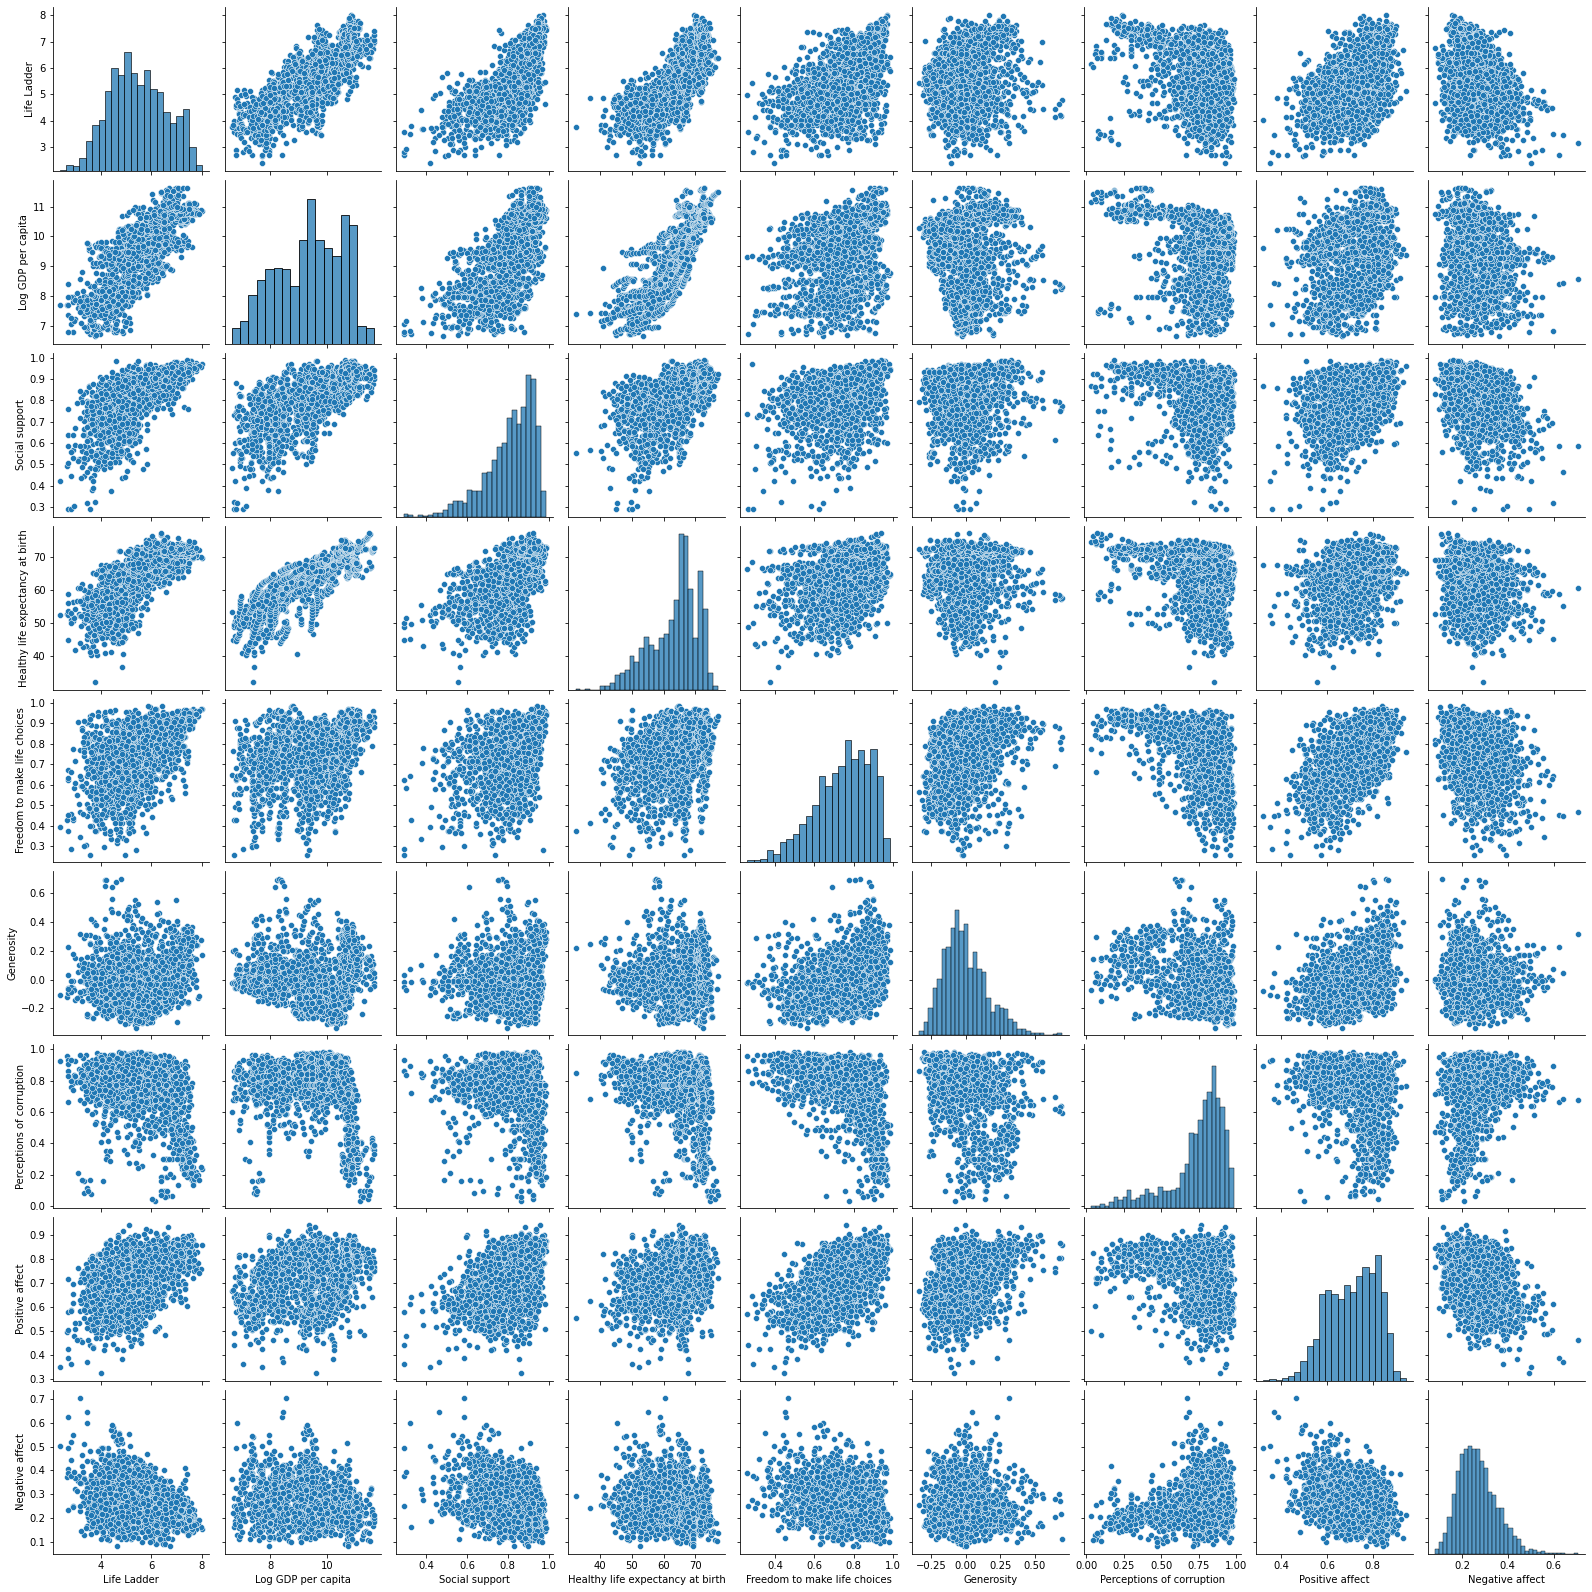

In [305]:
sns.pairplot(happy)

### Fitting and testing the data

In [306]:
y = happy['Life Ladder']

X = happy.drop(columns = ['Life Ladder'])

In [307]:
from sklearn.model_selection import train_test_split

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [309]:
from sklearn.linear_model import LinearRegression

In [310]:
lm = LinearRegression()

In [311]:
lm.fit(X_train,y_train)

LinearRegression()

In [312]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.37518066  1.99571178  0.02740572  0.3783512   0.41262232 -0.47364959
  1.92910009 -0.06375931]


In [313]:
predictions = lm.predict(X_test)

### Plotting the results of the actual values compared to the predicted values

Text(0, 0.5, 'Predicted Y')

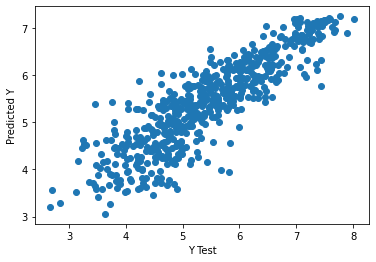

In [314]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating the model using the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

In [315]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.40783544729776694
MSE: 0.27391325248725634
RMSE: 0.5233672252704179


### The Errors seem to be quite small, therefore the model seems to predict actual values quite well. This should be tested looking for a normal distribution.

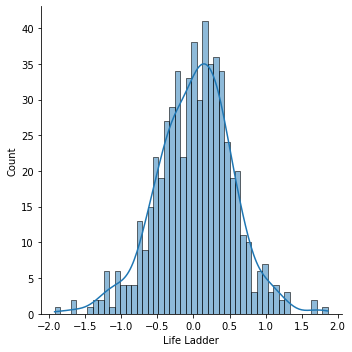

In [316]:
sns.displot((y_test-predictions),bins=50, kde = True);

### Turning the Coeffecients into a table to draw conclusions from

In [317]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Log GDP per capita,0.375181
Social support,1.995712
Healthy life expectancy at birth,0.027406
Freedom to make life choices,0.378351
Generosity,0.412622
Perceptions of corruption,-0.473650
Positive affect,1.929100
Negative affect,-0.063759


# Conclusions

The order of the top strongest predictors, from strongest to weakest, of World Happiness appear to be:
    
    1) Social Support
    2) Positive Affect
    3) Perceptions of corruption
    4) Generosity
    5) Freedom to make choices
    6) Log GDP per capita

Importantly, as both Social Support and Positive affect go up by one point, the ladder goes up two steps, making these very powerful indicators of World Happiness. To understand this better, the more a country of people has family or friends to be there for them when something bad happens in their life (Helliwell, Huang, Wang, & Norton, 2021), the happier the nation does. Further, the more people say that they are able to laugh, feel happy, joy, or a positive emotions each day throughout the week, the better at predicting the happiness of a nation. Conversely, the more people in a nation believe that there is corruption in either the government, business, or both, the amount of happiness in the country decresses by half a step. Interestingly, when people donate more money in a country, the happier they are, even more so than the freedom to choose what you want to do with your life, and the log GDP (GDP per capita). 